## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Lê o dataset
housing = pd.read_csv("housing.csv")

# Separa variáveis numéricas e categóricas
num_cols = housing.select_dtypes(include=["int64", "float64"]).columns
cat_cols = housing.select_dtypes(include=["object"]).columns

# Imputação de valores ausentes (numéricos → mediana)
imputer = SimpleImputer(strategy="median")
housing[num_cols] = imputer.fit_transform(housing[num_cols])

# Codificação one-hot das variáveis categóricas
housing = pd.get_dummies(housing, columns=cat_cols, drop_first=True)

# Define variáveis preditoras (X) e alvo (y)
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Divide entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 12) (4128, 12) (16512,) (4128,)


In [3]:
from sklearn.tree import DecisionTreeRegressor

final_tree = DecisionTreeRegressor(max_depth=8, random_state=42)
final_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Faz previsões na base de teste
y_pred_final = final_tree.predict(X_test)

# Calcula o erro médio quadrático (MSE) e a raiz do erro médio quadrático (RMSE)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)

print(f"MSE do modelo final: {mse_final:.2f}")
print(f"RMSE do modelo final: {rmse_final:.2f}")

MSE do modelo final: 3946099051.64
RMSE do modelo final: 62817.98


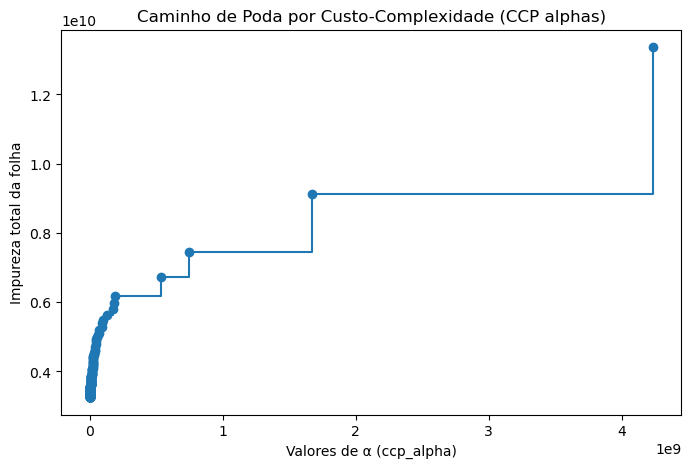

In [5]:
# Calcula o caminho de poda de custo-complexidade (CCP alphas)
path = final_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Visualiza o impacto dos alphas na complexidade da árvore
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Valores de α (ccp_alpha)")
plt.ylabel("Impureza total da folha")
plt.title("Caminho de Poda por Custo-Complexidade (CCP alphas)")
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

O que esse código faz:

- Cria várias árvores de decisão com diferentes valores de **ccp_alpha.**

- Cada α controla o nível de poda — quanto maior o α, mais simples e podada é a árvore.

- Armazena todas as árvores na lista trees para comparar depois o desempenho delas.

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Lista para armazenar as árvores treinadas
trees = []

# Treina uma árvore para cada valor de alpha (exceto o último, que gera árvore vazia)
for alpha in ccp_alphas[:-1]:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

print(f"Foram treinadas {len(trees)} árvores com diferentes valores de α.")

Foram treinadas 210 árvores com diferentes valores de α.


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [7]:
from sklearn.metrics import mean_squared_error

# Listas para armazenar os erros
mse_train = []
mse_test = []

# Calcula o MSE de cada árvore treinada
for tree in trees:
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Mostra quantos resultados foram calculados
print(f"Foram calculados {len(mse_train)} valores de MSE para treino e teste.")

Foram calculados 210 valores de MSE para treino e teste.


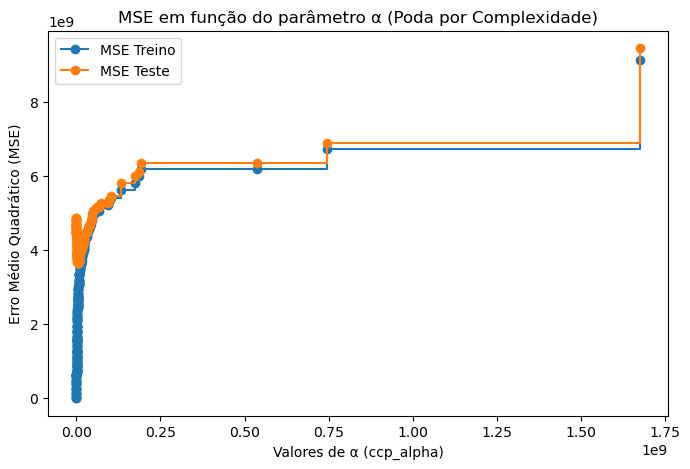

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas[:-1], mse_train, marker='o', label="MSE Treino", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], mse_test, marker='o', label="MSE Teste", drawstyle="steps-post")
plt.xlabel("Valores de α (ccp_alpha)")
plt.ylabel("Erro Médio Quadrático (MSE)")
plt.title("MSE em função do parâmetro α (Poda por Complexidade)")
plt.legend()
plt.show()

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

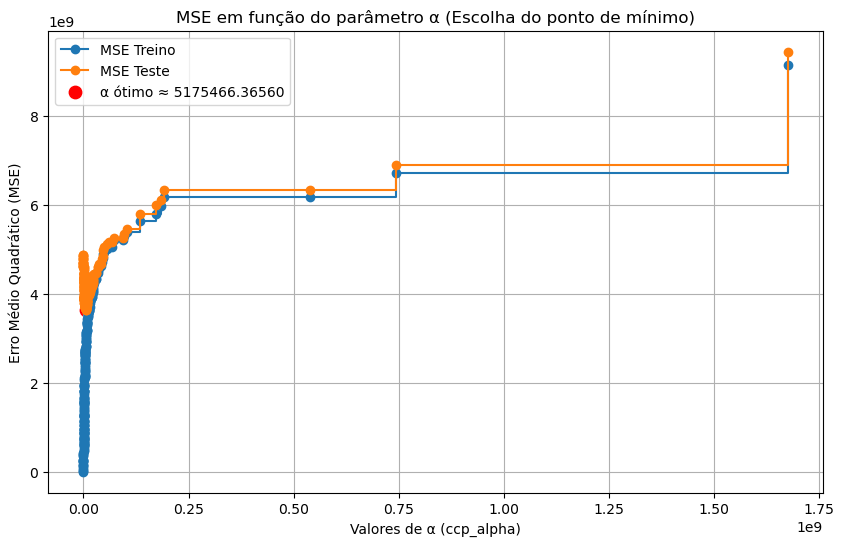

O menor MSE foi 3640890967.23, para α ≈ 5175466.36560


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Encontra o índice e o valor do menor MSE na base de teste
idx_min = np.argmin(mse_test)
alpha_min = ccp_alphas[idx_min]
mse_min = mse_test[idx_min]

# Gráfico do MSE pelo alpha
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], mse_train, marker='o', label="MSE Treino", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], mse_test, marker='o', label="MSE Teste", drawstyle="steps-post")

# Destaca o ponto de mínimo no gráfico
plt.scatter(alpha_min, mse_min, color='red', s=80, label=f"α ótimo ≈ {alpha_min:.5f}")

plt.xlabel("Valores de α (ccp_alpha)")
plt.ylabel("Erro Médio Quadrático (MSE)")
plt.title("MSE em função do parâmetro α (Escolha do ponto de mínimo)")
plt.legend()
plt.grid(True)
plt.show()

print(f"O menor MSE foi {mse_min:.2f}, para α ≈ {alpha_min:.5f}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [11]:
from sklearn.metrics import r2_score

# Treina novamente a árvore com o melhor α encontrado
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha_min)
best_tree.fit(X_train, y_train)

# Faz previsões
y_pred_best = best_tree.predict(X_test)

# Calcula o R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred_best)
print(f"R² do modelo com α ótimo ({alpha_min:.5f}): {r2:.4f}")

R² do modelo com α ótimo (5175466.36560): 0.7222


### 7. Visualize esta árvore.

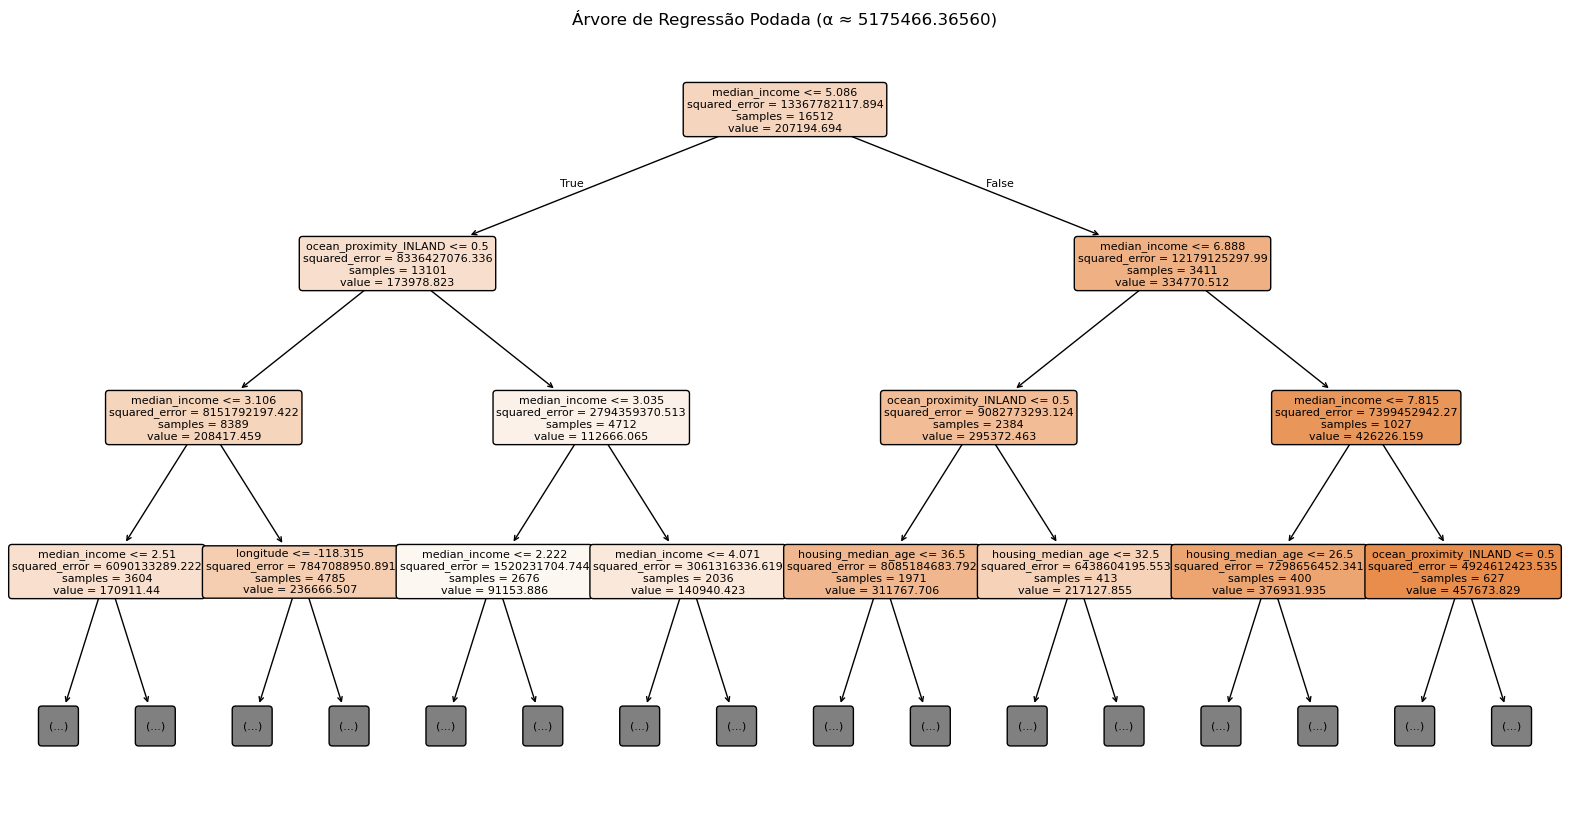

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    max_depth=3,              # 👈 limits visualization to the top 3 levels
    filled=True,
    feature_names=X.columns,
    rounded=True,
    fontsize=8
)
plt.title(f"Árvore de Regressão Podada (α ≈ {alpha_min:.5f})")
plt.show()